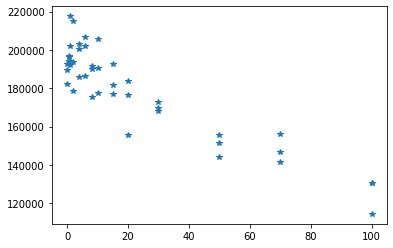

In [46]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

dfy_shallow = pd.read_excel('Lifetime_withwithout_flip.xlsx', sheet_name = 'By_PD02')
dfz_shallow = pd.read_excel('Lifetime_withwithout_flip.xlsx', sheet_name = 'Bz_PD02')

dfy_shallow = dfy_shallow.sort_values(by = ['BECHoldTime'])
dfy_shallow['BECHoldTime'] += 30
dfz_shallow = dfz_shallow.sort_values(by = ['BECHoldTime'])
dfz_shallow['BECHoldTime'] += 30

plt.figure()
plt.plot(dfz_shallow.iloc[:,0], dfz_shallow.iloc[:,1], '*')
plt.show()
#df.columns[0] = 'BECHoldTime'
#df.columns[1] = 'nC'

In [84]:
def linear(t, a, b):
    return a*t+b
dfy_shallow_early = dfy_shallow[dfy_shallow['BECHoldTime'] < 5]
dfz_shallow_early = dfz_shallow[dfz_shallow['BECHoldTime'] < 55]

popty_shallow, pcovy_shallow = curve_fit(linear, dfy_shallow_early.iloc[:,0], dfy_shallow_early.iloc[:,1])
poptz_shallow, pcovz_shallow = curve_fit(linear, dfz_shallow_early.iloc[:,0], dfz_shallow_early.iloc[:,1])



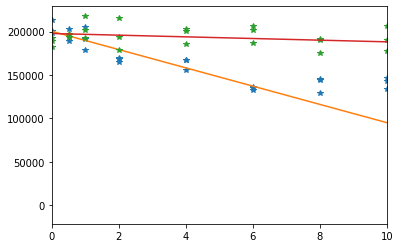

In [86]:
t = np.linspace(0,20, 100)
plt.figure()
plt.plot(dfy_shallow.iloc[:,0], dfy_shallow.iloc[:,1], '*')
plt.plot(t, linear(t, popty_shallow[0], popty_shallow[1]))
plt.plot(dfz_shallow.iloc[:,0], dfz_shallow.iloc[:,1], '*')
plt.plot(t, linear(t, poptz_shallow[0], poptz_shallow[1]))
plt.xlim([0,10])
plt.show()

In [88]:
popty_shallow[0]/poptz_shallow[0]

10.958796060694922